In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
print(os.getcwd())
df = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep='\t')
df.head()

/home/manan/Desktop/code/NLP/codes/2.TextClassification


,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
len(df)

5572

In [5]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

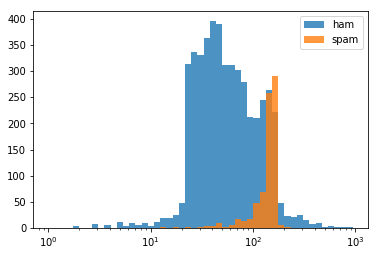

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=df[['length','punct']]
y=df['label']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
from sklearn import metrics
predictions=lr_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1404   44]
 [ 219    5]]


In [13]:
# You can make the confusion matrix less confusing by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
print(df)

       ham  spam
ham   1404    44
spam   219     5


In [14]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [15]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8427033492822966


In [16]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1438   10]
 [ 224    0]]


In [18]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [19]:
print(metrics.accuracy_score(y_test,predictions))

0.8600478468899522


In [20]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1373   75]
 [ 121  103]]


In [22]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

   micro avg       0.88      0.88      0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



In [23]:
print(metrics.accuracy_score(y_test,predictions))

0.8827751196172249
